In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

from mpl_toolkits.mplot3d import axes3d

import scipy as sp
import scipy.interpolate

import numpy as np

from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
sns.set_style('darkgrid') # set the grid style for the seaborn plots
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in pandas

In [57]:
data = pd.read_excel('data.xlsx')
data

,CH4_conv,C2_sel,Temp
0,22.66000,54.11000,441.50000
1,22.66000,54.16000,445.31000
2,22.66000,54.21000,449.13000
3,22.66000,54.26000,452.94000
4,22.66000,54.31000,456.75000
...,...,...,...
9995,33.79000,58.78000,848.49000
9996,33.79000,58.83000,848.40000
9997,33.79000,58.88000,848.30000
9998,33.79000,58.93000,848.21000


In [58]:
for i in range(len(data.columns)):
    Attribute_id = 'Attribute_' + str(i)
    Attribute_id = data.iloc[:,i]

In [59]:
df = pd.DataFrame()
for i in range(len(data.columns)):
    df[f"Attribute_{i}"] = data.iloc[:,i]
    
df['Index'] = ['Point'] * len(df)
df['ID'] = range(1, 1+len(df))
df["Index"] = df["Index"] + ' ' + df["ID"].astype(str)
df = df.drop(['ID'], axis=1)
df

,Attribute_0,Attribute_1,Attribute_2,Index
0,22.66000,54.11000,441.50000,Point 1
1,22.66000,54.16000,445.31000,Point 2
2,22.66000,54.21000,449.13000,Point 3
3,22.66000,54.26000,452.94000,Point 4
4,22.66000,54.31000,456.75000,Point 5
...,...,...,...,...
9995,33.79000,58.78000,848.49000,Point 9996
9996,33.79000,58.83000,848.40000,Point 9997
9997,33.79000,58.88000,848.30000,Point 9998
9998,33.79000,58.93000,848.21000,Point 9999


In [60]:
dft = df
df1 = dft.drop(['Index'], axis = 1)
df1

,Attribute_0,Attribute_1,Attribute_2
0,22.66000,54.11000,441.50000
1,22.66000,54.16000,445.31000
2,22.66000,54.21000,449.13000
3,22.66000,54.26000,452.94000
4,22.66000,54.31000,456.75000
...,...,...,...
9995,33.79000,58.78000,848.49000
9996,33.79000,58.83000,848.40000
9997,33.79000,58.88000,848.30000
9998,33.79000,58.93000,848.21000


In [61]:
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)

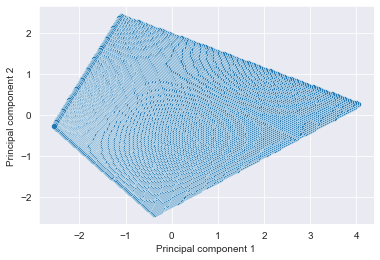

In [62]:
pca = PCA(n_components=2)
pca.fit(scaled_features)
pca_data = pca.transform(scaled_features)
pca_df = pd.DataFrame(data = pca_data, columns = ['PC1', 'PC2'])

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

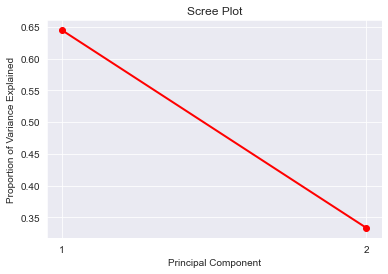

In [63]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1,3,1))
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [64]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.64455199 0.33333333]
Cumulative Prop. Variance Explained:  [0.64455199 0.97788533]


In [65]:
print(pca.explained_variance_) 

[1.93384937 1.00010001]


In [66]:
pc1_loading_scores = pd.DataFrame(data=pca.components_[0], index=df1.columns, columns=['PC1 Loading Score'])
pc1_loading_scores.sort_values(by='PC1 Loading Score', ascending=False, inplace=True)
pc1_loading_scores

,PC1 Loading Score
Attribute_1,-0.44295
Attribute_0,-0.55118
Attribute_2,-0.70711


In [67]:
pc2_loading_scores = pd.DataFrame(data=pca.components_[1], index=df1.columns, columns=['PC2 Loading Score'])
pc2_loading_scores.sort_values(by='PC2 Loading Score', ascending=False, inplace=True)
pc2_loading_scores

,PC2 Loading Score
Attribute_0,0.62642
Attribute_2,0.00000
Attribute_1,-0.77949


In [68]:
# KMeans clustering 

pca_df = pd.DataFrame(data=pca_data, index=dft['Index'], columns=['PC 1', 'PC 2'])
pca_df.reset_index(inplace=True) # reset the index
pca_df.head(3)

scaler = StandardScaler()
scaler.fit(pca_df.drop('Index', axis=1)) 
scaled_pca_features = scaler.transform(pca_df.drop('Index', axis=1))
scaled_pca_data = pd.DataFrame(data=scaled_pca_features, columns=pca_df.drop('Index', axis=1).columns)

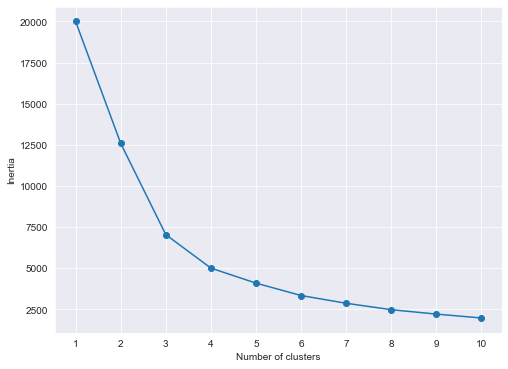

In [69]:
#Elbow method

scaler = StandardScaler()
scaler.fit(pca_df.drop('Index', axis=1))
scaled_pca_features = scaler.transform(pca_df.drop('Index', axis=1))
scaled_pca_data = pd.DataFrame(data=scaled_pca_features, columns=pca_df.drop('Index', axis=1).columns)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=scaled_pca_data)
    inertia.append(kmeans.inertia_)
elbow_df = pd.DataFrame({'Number of clusters':range(1, 11), 'Inertia':inertia})

plt.figure(figsize=(8,6))
plt.plot(elbow_df['Number of clusters'], elbow_df['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, len(inertia)+1, 1))
plt.ylabel('Inertia')
plt.show()

In [70]:
# KMeans cluster creation

kmeans = KMeans(n_clusters=3)
kmeans.fit(X=scaled_pca_data)
pca_df['Cluster Label'] = kmeans.labels_ # add cluster labels for players as a new column to the pca_df dataframe
print(pca_df.columns.tolist())

['Index', 'PC 1', 'PC 2', 'Cluster Label']


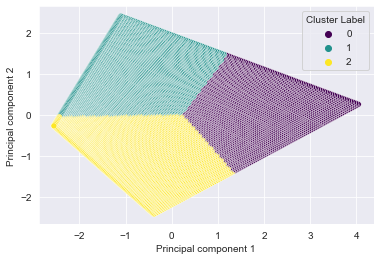

In [71]:
# Analysis and visualisation

sns.scatterplot(x='PC 1', y='PC 2', data=pca_df, hue='Cluster Label', palette='viridis')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

In [72]:
pca_cluster_0 = pca_df[pca_df['Cluster Label']==0]['Index']
pca_cluster_1 = pca_df[pca_df['Cluster Label']==1]['Index']
pca_cluster_2 = pca_df[pca_df['Cluster Label']==2]['Index']

In [73]:
print('\nCluster 0 Points:\n')
print(pca_cluster_0)
print('\n\n')
print('Cluster 1 Points:\n')
print(pca_cluster_1)
print('\n\n')
print('Cluster 2 Points:\n')
print(pca_cluster_2)


Cluster 0 Points:

0          Point 1
1          Point 2
2          Point 3
3          Point 4
4          Point 5
           ...    
5409    Point 5410
5500    Point 5501
5501    Point 5502
5502    Point 5503
5503    Point 5504
Name: Index, Length: 2811, dtype: object



Cluster 1 Points:

4842    Point 4843
4843    Point 4844
4844    Point 4845
4845    Point 4846
4846    Point 4847
           ...    
9986    Point 9987
9987    Point 9988
9988    Point 9989
9989    Point 9990
9990    Point 9991
Name: Index, Length: 3402, dtype: object



Cluster 2 Points:

61         Point 62
62         Point 63
63         Point 64
64         Point 65
65         Point 66
           ...     
9995     Point 9996
9996     Point 9997
9997     Point 9998
9998     Point 9999
9999    Point 10000
Name: Index, Length: 3787, dtype: object


In [74]:
final_data = pd.merge(left=pca_df[['Index','PC 1','PC 2', 'Cluster Label']],
                      right=df,
                      how='inner', on='Index')

In [75]:
final_data = final_data.sort_values(by='PC 1', ascending=False)
#final_data.sort_values(by='PC 1', ascending=False).head(10)
final_data.reset_index(drop=True, inplace=True)
final_data

,Index,PC 1,PC 2,Cluster Label,Attribute_0,Attribute_1,Attribute_2
0,Point 1,4.04122,0.26276,0,22.66000,54.11000,441.50000
1,Point 2,3.99580,0.23531,0,22.66000,54.16000,445.31000
2,Point 101,3.99037,0.28399,0,22.77000,54.11000,445.61000
3,Point 3,3.95029,0.20786,0,22.66000,54.21000,449.13000
4,Point 102,3.94525,0.25654,0,22.77000,54.16000,449.38000
...,...,...,...,...,...,...,...
9995,Point 9899,-2.51511,-0.25654,2,33.68000,58.93000,847.83000
9996,Point 9998,-2.52187,-0.20786,2,33.79000,58.88000,848.30000
9997,Point 9900,-2.53024,-0.28399,2,33.68000,58.98000,847.77000
9998,Point 9999,-2.53676,-0.23531,2,33.79000,58.93000,848.21000
